In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [10]:
# Inspect Measurement table
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [11]:
session.query(Measurement.date).\
            order_by(Measurement.date).first()

('2010-01-01')

In [12]:
# Find latest date
last_date = session.query(Measurement.date).\
            order_by(Measurement.date.desc()).first()
last_date

('2017-08-23')

In [13]:
# Calculate the date 1 year ago from the last data point in the database
year_date = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(year_date)

2016-08-23


In [14]:
# Perform a query to retrieve the data and precipitation scores
year_precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= year_date).all()
year_precip

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [15]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precip_df = pd.DataFrame(year_precip, columns=['Date', 'Precipitation'])
precip_df['Date'] = pd.to_datetime(precip_df['Date'])
precip_df.set_index('Date', inplace=True)
precip_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00


In [16]:
# Sort the dataframe by date
precip_df.sort_values(by='Date', inplace=True)
precip_df.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15


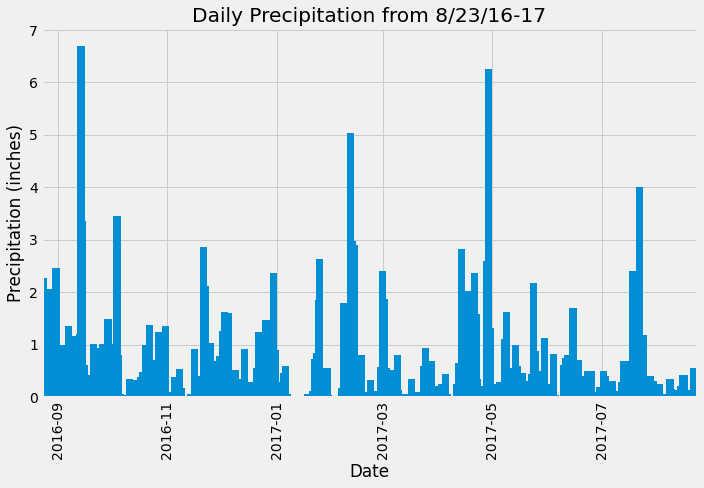

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data
# Create figure and plot space
fig, ax = plt.subplots(figsize=(10,7))

# Add x-axis and y-axis
ax.bar(precip_df.index, precip_df['Precipitation'], width = 4)

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (inches)",
       title="Daily Precipitation from 8/23/16-17",
       xlim = [dt.datetime(2016, 8, 23), dt.datetime(2017, 8, 23)])

plt.xticks(rotation=90)
fig.tight_layout()
plt.show()

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [19]:
# Inspect Station table
inspector = inspect(engine)
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [20]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(func.count(Station.id)).all()
stations

[(9)]

In [21]:
# Design a query to show how many stations are available in this dataset?
stations_alt = session.query(func.count((Measurement.station).distinct())).all()
stations_alt

[(9)]

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
most_active = session.query(Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
most_active

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

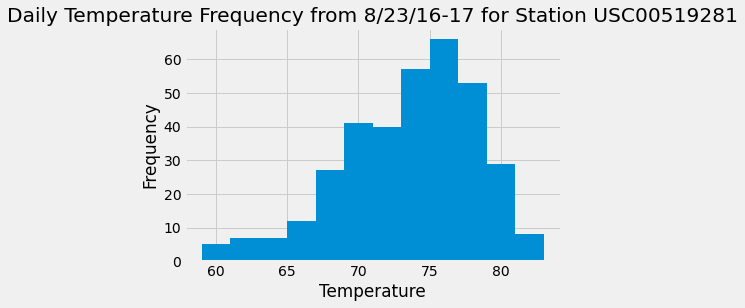

In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
station_temp = session.query(Measurement.tobs).filter(Measurement.date >= year_date).\
            filter(Measurement.station == "USC00519281").all()
station_list = [result[0] for result in station_temp]

#plot the results as a histogram
plt.hist(station_list, bins=12)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Daily Temperature Frequency from 8/23/16-17 for Station USC00519281')

plt.show()

## Bonus Challenge Assignment

In [25]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [26]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
print(calc_temps('2011-07-26', '2011-08-03'))

[(67.0, 74.92537313432835, 80.0)]


In [27]:
trip_temps = calc_temps('2011-07-26', '2011-08-03')
TAVG = [result[1] for result in trip_temps]
TMIN = [result[0] for result in trip_temps]
TMAX = [result[2] for result in trip_temps]

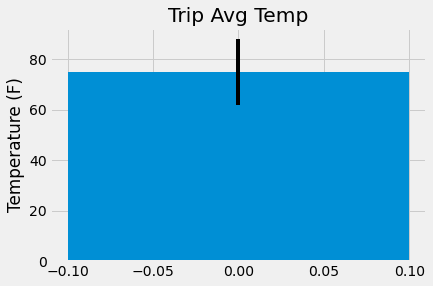

In [28]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
y_value = TAVG[0]
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
y_err = TMAX[0] - TMIN[0]
# Use Pandas Plotting with Matplotlib to plot the data
# Create figure and plot space

plt.bar(0, y_value, width = 0.2, yerr=y_err)

plt.ylabel('Temperature (F)')
plt.title('Trip Avg Temp')
plt.xticks()

plt.show()

In [29]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [30]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [31]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip
start_date = dt.datetime.strptime('2011-07-26',"%Y-%m-%d")
end_date = dt.datetime.strptime('2011-08-03', "%Y-%m-%d")
# Use the start and end date to create a range of dates
date_range = (start_date + dt.timedelta(days=x) for x in range(0, (end_date-start_date).days))
# Stip off the year and save a list of %m-%d strings
dates = []
for date in date_range:
    dates.append(date.strftime("%m-%d"))
# Loop through the list of %m-%d strings and calculate the normals for each date
normals = []
for date in dates:
    normals.append(daily_normals(date))
print(normals)

[[(71.0, 76.4423076923077, 86.0)], [(68.0, 76.58181818181818, 83.0)], [(69.0, 76.46428571428571, 82.0)], [(69.0, 76.47058823529412, 83.0)], [(69.0, 77.35185185185185, 84.0)], [(72.0, 77.03571428571429, 83.0)], [(67.0, 75.54, 83.0)], [(68.0, 75.60377358490567, 84.0)]]


In [32]:
TMIN = [result[0][0] for result in normals]
TAVG = [result[0][1] for result in normals]
TMAX = [result[0][2] for result in normals]
temp_normals = {'Tmin':TMIN, 'Tavg':TAVG, 'Tmax':TMAX}

In [33]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
df = pd.DataFrame(temp_normals, index = dates)
df

,Tmin,Tavg,Tmax
07-26,71.0,76.442308,86.0
07-27,68.0,76.581818,83.0
07-28,69.0,76.464286,82.0
07-29,69.0,76.470588,83.0
07-30,69.0,77.351852,84.0
07-31,72.0,77.035714,83.0
08-01,67.0,75.540000,83.0
08-02,68.0,75.603774,84.0


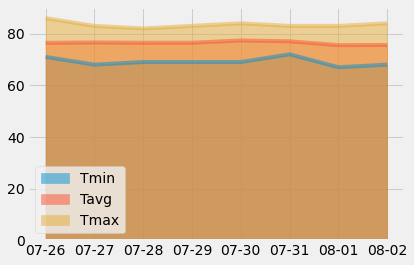

In [34]:
# Plot the daily normals as an area plot with `stacked=False`
df.plot.area(stacked=False)